In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-dataset/advertising.csv


In [67]:
df=pd.read_csv("/kaggle/input/advertising-dataset/advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [68]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [69]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

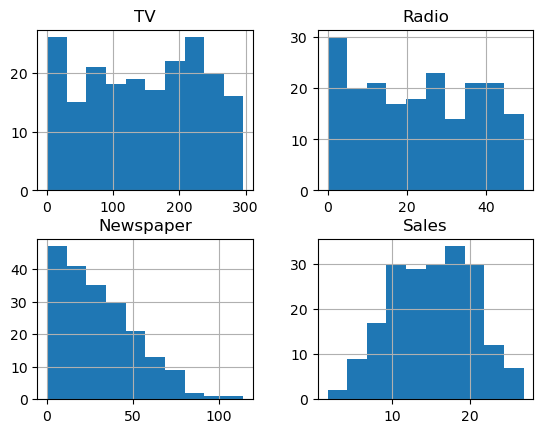

In [70]:
df.hist()

In [71]:
corr=df.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<Axes: ylabel='Density'>

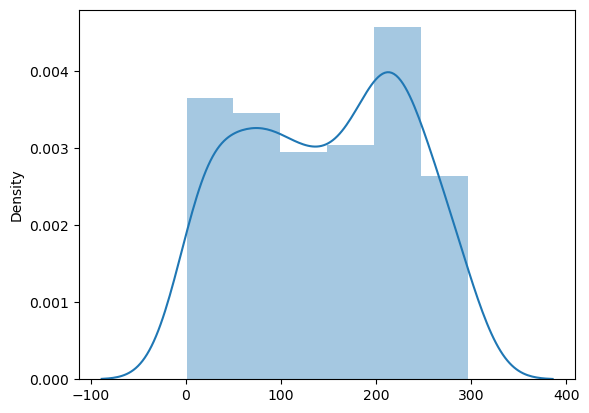

In [73]:
sns.distplot(x=df['TV'])

In [74]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<Axes: ylabel='Density'>

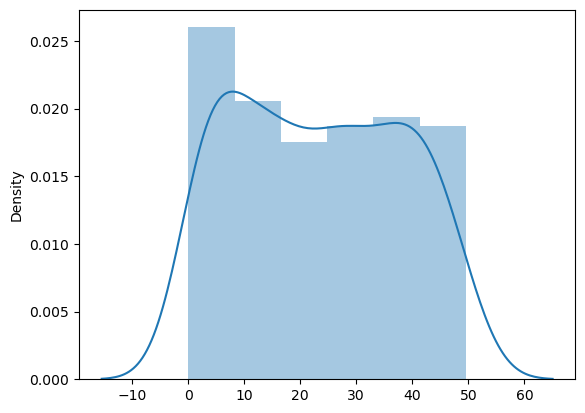

In [76]:
sns.distplot(x=df['Radio'])

<Axes: ylabel='Density'>

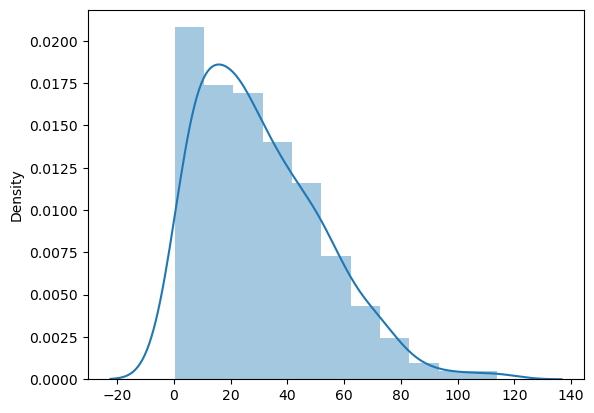

In [77]:
sns.distplot(x=df['Newspaper'])

<Axes: >

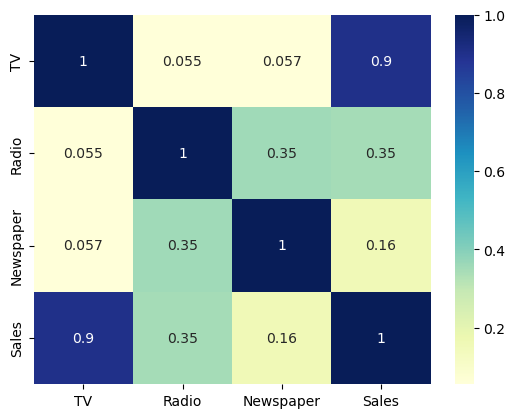

In [78]:
sns.heatmap(corr,annot=True,cmap='YlGnBu')

***It is clear that advertising on tv leads to more sales i.e we can see in the correlation map that Tv is highly correlated to the sales this clearly indicates that tv has more impact then radio and the newspaper and it is also clear that audio visual and audio advertizements has more postive impact on the sales.***

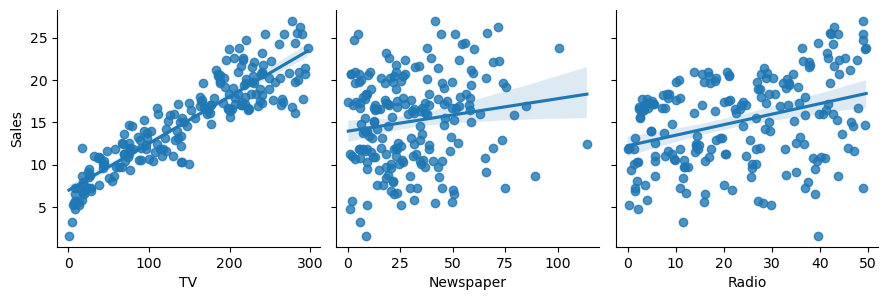

In [79]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=3,  kind='reg')
plt.show()


It recommends that linear regression model may be the best fit 
we will try  linear regression 

## fitting the data by splittng the data

In [80]:
x=df.drop(columns=['Sales'])
y=df['Sales']
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [81]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

model fitting

In [82]:
from sklearn.model_selection import train_test_split,cross_val_score
def classify(model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    model.fit(x_train,y_train)
    print("Accuracy on test data:",model.score(x_test,y_test))
    print("Accuracy on full data:",model.score(x,y))
    print(cross_val_score(model,x,y,cv=5))
    print("Cross validation score on full data is",np.mean(cross_val_score(model,x,y,cv=5)))
    

In [83]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
classify(model)

Accuracy on test data: 0.8785400495428056
Accuracy on full data: 0.9010384742573576
[0.87556263 0.93177791 0.92150403 0.84554586 0.90247132]
Cross validation score on full data is 0.8953723525274103


Complete data fitting for the model

In [84]:
model=LinearRegression()
model.fit(x,y)


LinearRegression()

In [89]:
testdat=x.iloc[150:,:]

In [86]:
testdat.head()

,TV,Radio,Newspaper
150,280.7,13.9,37.0
151,121.0,8.4,48.7
152,197.6,23.3,14.2
153,171.3,39.7,37.7
154,187.8,21.1,9.5


In [87]:
model.predict(testdat)

array([21.40779104, 12.12822036, 17.88150523, 18.21228932, 17.11095629,
        6.09147928, 14.40908701, 12.92836006,  9.22565677, 13.77606971,
       15.96404812, 13.13831936, 16.82802417, 17.46713823, 12.58090014,
       17.78492754,  9.63019994, 16.4474296 , 18.89730805, 21.24042066,
        8.59480345, 15.8336908 ,  7.84869225, 14.55779863, 17.10206692,
       24.94755122, 21.38770686, 14.73822063, 19.94432942, 14.71726516,
       13.43232243, 17.10853074,  8.30485298, 24.90888356, 20.73265903,
       20.61884334, 12.45394152, 18.10675693, 21.68517626,  6.94582943,
       11.1754297 ,  9.89340771,  6.01090333, 18.20194019, 16.58691507,
        7.10548951, 10.28094143, 15.25928683, 24.58221952, 18.18512048])